In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix


In [7]:
df=mnist.load_data()
df

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [7]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [5]:
X_test

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


bulding a CNN model

In [14]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


In [15]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Training the model

In [16]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/10
469/469 [==============================] - 50s 103ms/step - loss: 0.2925 - accuracy: 0.9120 - val_loss: 0.0588 - val_accuracy: 0.9818
Epoch 2/10
469/469 [==============================] - 50s 108ms/step - loss: 0.0929 - accuracy: 0.9729 - val_loss: 0.0411 - val_accuracy: 0.9870
Epoch 3/10
469/469 [==============================] - 48s 103ms/step - loss: 0.0710 - accuracy: 0.9790 - val_loss: 0.0369 - val_accuracy: 0.9886
Epoch 4/10
469/469 [==============================] - 47s 99ms/step - loss: 0.0578 - accuracy: 0.9829 - val_loss: 0.0332 - val_accuracy: 0.9892
Epoch 5/10
469/469 [==============================] - 44s 94ms/step - loss: 0.0476 - accuracy: 0.9852 - val_loss: 0.0287 - val_accuracy: 0.9902
Epoch 6/10
469/469 [==============================] - 45s 97ms/step - loss: 0.0421 - accuracy: 0.9873 - val_loss: 0.0264 - val_accuracy: 0.9905
Epoch 7/10
469/469 [==============================] - 45s 95ms/step - loss: 0.0369 - accuracy: 0.9887 - val_loss: 0.0230 - val_accura

evaluating the model


In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy}')


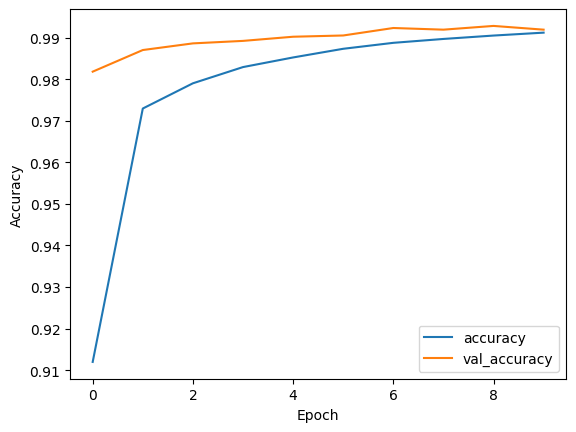

In [18]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [19]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy}')

313/313 [==============================] - 3s 10ms/step - loss: 0.0234 - accuracy: 0.9919
Test accuracy: 0.9919000267982483


In [20]:
plt.figure(figsize=(12, 5))


<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

validation accuracy

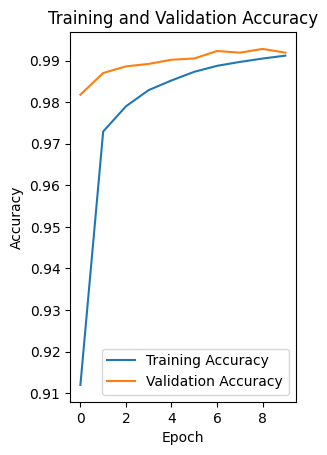

In [21]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


validation loss

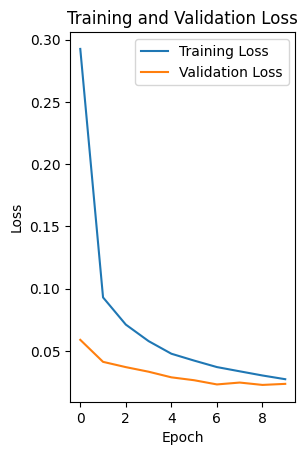

In [22]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


In [23]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

loading y_train data to implement pie chart visualization

In [26]:
(_, y_train), (_, _) = mnist.load_data()
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

counting digit occurences for plotting

In [28]:
digit_counts = np.bincount(y_train)
digit_counts


array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949])

In [32]:
cumulative_counts = np.cumsum(digit_counts)


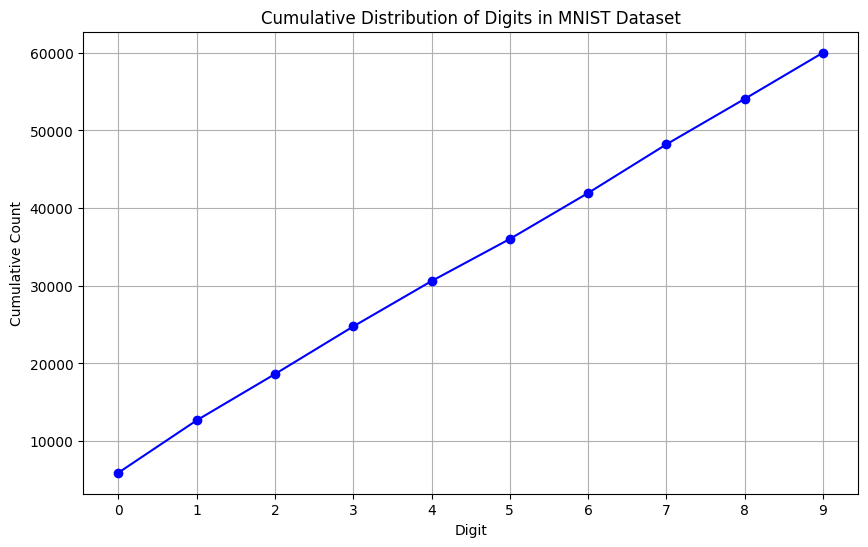

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(range(10), cumulative_counts, marker='o', linestyle='-', color='b')
plt.xlabel('Digit')
plt.ylabel('Cumulative Count')
plt.title('Cumulative Distribution of Digits in MNIST Dataset')
plt.xticks(range(10))
plt.grid(True)
plt.show()

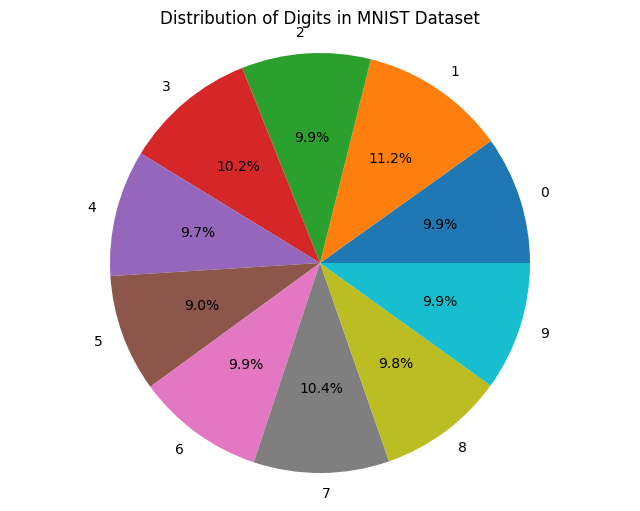

In [29]:
plt.figure(figsize=(8, 6))
plt.pie(digit_counts, labels=range(10), autopct='%1.1f%%')
plt.title('Distribution of Digits in MNIST Dataset')
plt.axis('equal')
plt.show()

plotting bar graph

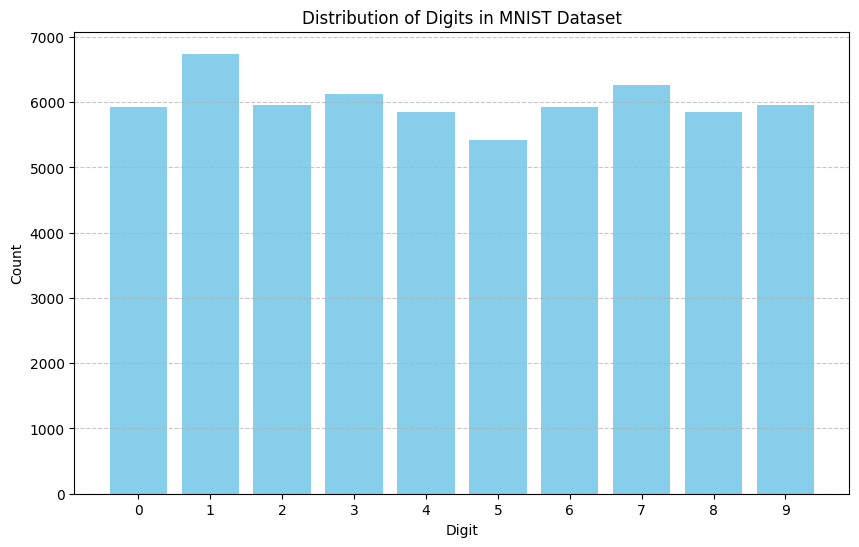

In [30]:
plt.figure(figsize=(10, 6))
plt.bar(range(10), digit_counts, color='skyblue')
plt.xlabel('Digit')
plt.ylabel('Count')
plt.title('Distribution of Digits in MNIST Dataset')
plt.xticks(range(10))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

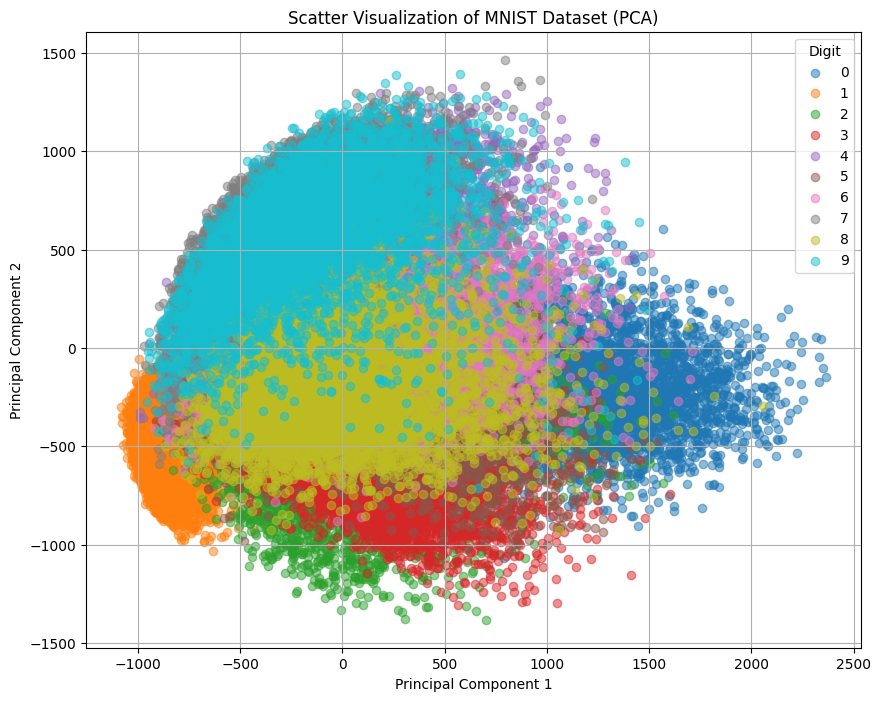

In [31]:
from sklearn.decomposition import PCA
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(X_train, y_train), (_, _) = mnist.load_data()

# Flatten images
X_train_flat = X_train.reshape(-1, 28*28)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_flat)

# Plot scatter visualization
plt.figure(figsize=(10, 8))
for digit in range(10):
    plt.scatter(X_train_pca[y_train == digit, 0], X_train_pca[y_train == digit, 1], label=str(digit), alpha=0.5)
plt.title('Scatter Visualization of MNIST Dataset (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Digit')
plt.grid(True)
plt.show()
